# Data Matrix, X n by m (Not mean centered and normal standardized)
-Assumption is that the Rows are observations, Cols are variables/features

In [2]:
import numpy as np
X = np.array([[1,4,6,7,10,13],
             [3,6,8,2,4,3],
             [6,7,8,4,1,5]])

# Covariance Matrix of Data X
Testing the covariance matrix method by numpy against mathematical formula where 

Covariance matrix = Cross product of the transpose of X centered and X centered divided by n-1 (no. of rows - 1)

In [3]:
S = np.cov(X,rowvar = False)
S

array([[  6.33333333,   3.66666667,   2.33333333,  -3.16666667,
        -11.        ,  -9.        ],
       [  3.66666667,   2.33333333,   1.66666667,  -2.83333333,
         -7.        ,  -7.        ],
       [  2.33333333,   1.66666667,   1.33333333,  -2.66666667,
         -5.        ,  -6.        ],
       [ -3.16666667,  -2.83333333,  -2.66666667,   6.33333333,
          8.5       ,  13.        ],
       [-11.        ,  -7.        ,  -5.        ,   8.5       ,
         21.        ,  21.        ],
       [ -9.        ,  -7.        ,  -6.        ,  13.        ,
         21.        ,  28.        ]])

In [41]:
Xc = X - np.tile(np.mean(X, axis = 0), (3,1))
CovarianceX = Xc.T@Xc/2
CovarianceX


array([[  6.33333333,   3.66666667,   2.33333333,  -3.16666667,
        -11.        ,  -9.        ],
       [  3.66666667,   2.33333333,   1.66666667,  -2.83333333,
         -7.        ,  -7.        ],
       [  2.33333333,   1.66666667,   1.33333333,  -2.66666667,
         -5.        ,  -6.        ],
       [ -3.16666667,  -2.83333333,  -2.66666667,   6.33333333,
          8.5       ,  13.        ],
       [-11.        ,  -7.        ,  -5.        ,   8.5       ,
         21.        ,  21.        ],
       [ -9.        ,  -7.        ,  -6.        ,  13.        ,
         21.        ,  28.        ]])

# Correlation Matrix of Data X
Testing the correlation matrix method by numpy against mathematical formula where

Correlation matrix = Cross product of the transpose of X standardized and X standardized divided by n (no. of rows)|

In [6]:
C = np.corrcoef(X,rowvar = False)
C

array([[ 1.        ,  0.95382097,  0.80295507, -0.5       , -0.95382097,
        -0.67584534],
       [ 0.95382097,  1.        ,  0.94491118, -0.73704347, -1.        ,
        -0.8660254 ],
       [ 0.80295507,  0.94491118,  1.        , -0.91766294, -0.94491118,
        -0.98198051],
       [-0.5       , -0.73704347, -0.91766294,  1.        ,  0.73704347,
         0.97622104],
       [-0.95382097, -1.        , -0.94491118,  0.73704347,  1.        ,
         0.8660254 ],
       [-0.67584534, -0.8660254 , -0.98198051,  0.97622104,  0.8660254 ,
         1.        ]])

In [7]:
Xs = Xc/np.tile(np.std(X,axis=0),(3,1))
CorrelationX = Xs.T@Xs/3
CorrelationX

array([[ 1.        ,  0.95382097,  0.80295507, -0.5       , -0.95382097,
        -0.67584534],
       [ 0.95382097,  1.        ,  0.94491118, -0.73704347, -1.        ,
        -0.8660254 ],
       [ 0.80295507,  0.94491118,  1.        , -0.91766294, -0.94491118,
        -0.98198051],
       [-0.5       , -0.73704347, -0.91766294,  1.        ,  0.73704347,
         0.97622104],
       [-0.95382097, -1.        , -0.94491118,  0.73704347,  1.        ,
         0.8660254 ],
       [-0.67584534, -0.8660254 , -0.98198051,  0.97622104,  0.8660254 ,
         1.        ]])

# Correlation Matrix of Data X
Testing the conversion of Covariance Matrix dof of n-1 to Correlation Matrix using linear algebra and checking against Correlation Matrix using dof of n

In [8]:
v = np.sqrt(np.diag(CovarianceX))
outer_v = np.outer(v, v)
correlation = CovarianceX / outer_v

print(CorrelationX,correlation)

[[ 1.          0.95382097  0.80295507 -0.5        -0.95382097 -0.67584534]
 [ 0.95382097  1.          0.94491118 -0.73704347 -1.         -0.8660254 ]
 [ 0.80295507  0.94491118  1.         -0.91766294 -0.94491118 -0.98198051]
 [-0.5        -0.73704347 -0.91766294  1.          0.73704347  0.97622104]
 [-0.95382097 -1.         -0.94491118  0.73704347  1.          0.8660254 ]
 [-0.67584534 -0.8660254  -0.98198051  0.97622104  0.8660254   1.        ]] [[ 1.          0.95382097  0.80295507 -0.5        -0.95382097 -0.67584534]
 [ 0.95382097  1.          0.94491118 -0.73704347 -1.         -0.8660254 ]
 [ 0.80295507  0.94491118  1.         -0.91766294 -0.94491118 -0.98198051]
 [-0.5        -0.73704347 -0.91766294  1.          0.73704347  0.97622104]
 [-0.95382097 -1.         -0.94491118  0.73704347  1.          0.8660254 ]
 [-0.67584534 -0.8660254  -0.98198051  0.97622104  0.8660254   1.        ]]


# Eigenvectors decomposition of the Square Product Matrices of X to obtain SVD of X

In [9]:
U, S, VT = np.linalg.svd(X, full_matrices= True)

print((X@X.T@U).all() == (U@(np.diag(S)@np.diag(S))).all())


Sigma = np.append(np.diag(S), np.zeros((3,3)), axis = 1)
Sigma = np.append(Sigma, np.zeros((3,6)), axis = 0)
print(np.round(X.T@X@VT.T,1).any() == np.round(VT.T@Sigma@Sigma,1).any())

True
True


# PCs of Xc are the eigenvectors of the Covariance matrix
-Assumption is that the Rows are observations, Cols are variables/features

Note for PCA in  sklearn, the input data must be centered but not necessarily standardized. The whiten True parameter standardizes the compenents which is the principal compenents after PC has been found. So regardless first standardize the features if they are not from the scame scale of measurement

In [42]:
# To prove the that PCs of X centered are eigenvectors of the Covariance matrix
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponent = pca.fit_transform(Xc)
print(principalComponent)

PC1 = np.linalg.eig(CovarianceX)[1][:,0]
PC2 = np.linalg.eig(CovarianceX)[1][:,1]
PC3 = np.linalg.eig(CovarianceX)[1][:,2]
#Note linalg eig not in order of importance
PCT = np.array([PC1,PC2,PC3])
PC = PCT.T
print(Xc@PC)

[[ 8.83666581e+00 -1.56359924e-01  2.08515983e-16]
 [-4.01456456e+00  2.64468948e+00  2.08515983e-16]
 [-4.82210125e+00 -2.48832956e+00  2.08515983e-16]]
[[ 8.83666581e+00+0.j  1.11022302e-15+0.j -1.56359924e-01+0.j]
 [-4.01456456e+00+0.j -8.32667268e-16+0.j  2.64468948e+00+0.j]
 [-4.82210125e+00+0.j  8.32667268e-17+0.j -2.48832956e+00+0.j]]


In [29]:
#To show that get_covariance method same as the covariance matrix from our own calculation of the covariance matrix formula
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(Xc)
print(principalComponent)

cov = pca.get_covariance()
PC1 = np.linalg.eig(cov)[1][:,0]
PC2 = np.linalg.eig(cov)[1][:,1]
PC3 = np.linalg.eig(cov)[1][:,2]
PCT = np.array([PC1,PC2,PC3])
PC = PCT.T
print(Xc@PC)

PCA(n_components=3)
[[-0.27363116+0.j -0.79498968+0.j -0.54140317+0.j]
 [-0.19152213+0.j  0.17807553+0.j -0.16468648+0.j]
 [-0.15046761+0.j  0.03566915+0.j  0.02367186+0.j]
 [ 0.29406   +0.j  0.19563988+0.j -0.43589634+0.j]
 [ 0.57456638+0.j -0.53422658+0.j  0.49405945+0.j]
 [ 0.67022903+0.j  0.10646701+0.j -0.495076  +0.j]]
[[ 8.83666581e+00+0.j -2.22044605e-15+0.j -1.56359924e-01+0.j]
 [-4.01456456e+00+0.j -1.88737914e-15+0.j  2.64468948e+00+0.j]
 [-4.82210125e+00+0.j  4.27435864e-15+0.j -2.48832956e+00+0.j]]


In [9]:
#To show that PCA is affected by the standard deviations of the features. 
#Not depicted here but so if one were to be more spread out due to its scale of measurement, it would be biased towards it

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(Xs)
print(principalComponent)

cov = pca.get_covariance()
PC1 = np.linalg.eig(cov)[1][:,0]
PC2 = np.linalg.eig(cov)[1][:,1]
PC3 = np.linalg.eig(cov)[1][:,2]
PCT = np.array([PC1,PC2,PC3])
PC = PCT.T
print(Xs@PC)


[[ 3.23322276 -0.14126133]
 [-1.27924     1.08597169]
 [-1.95398277 -0.94471036]]
[[ 3.23322276e+00 -6.93889390e-16 -1.41261328e-01]
 [-1.27924000e+00  8.88178420e-16  1.08597169e+00]
 [-1.95398277e+00 -2.77555756e-16 -9.44710358e-01]]


In [12]:
#To show that the eigenvectors of the covariance matrix of the Xc data is also the same as the eigenvectors of the square c.p matrix of Xc
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(Xc)
print(principalComponent)

PC1 = np.linalg.eig(Xc.T@Xc)[1][:,0]
PC2 = np.linalg.eig(Xc.T@Xc)[1][:,1]
PC3 = np.linalg.eig(Xc.T@Xc)[1][:,2]
PCT = np.array([PC1,PC2,PC3])
PC = PCT.T
print(Xc@PC)

[[ 8.83666581 -0.15635992]
 [-4.01456456  2.64468948]
 [-4.82210125 -2.48832956]]
[[ 8.83666581e+00+0.j  1.11022302e-15+0.j -1.56359924e-01+0.j]
 [-4.01456456e+00+0.j -8.32667268e-16+0.j  2.64468948e+00+0.j]
 [-4.82210125e+00+0.j  8.32667268e-17+0.j -2.48832956e+00+0.j]]


In [14]:
# Only the eigenvalues are different by n-1, in this case 3-1 = 2
print(np.linalg.eig(Xc.T@Xc))
print(np.linalg.eig(CovarianceX))

(array([ 1.17456052e+02+0.00000000e+00j,  7.86978587e-15+0.00000000e+00j,
        1.32106149e+01+0.00000000e+00j, -3.63228660e-15+0.00000000e+00j,
       -2.56621972e-17+1.77314981e-16j, -2.56621972e-17-1.77314981e-16j]), array([[-2.73631157e-01+0.j        , -7.94989681e-01+0.j        ,
        -5.41403174e-01+0.j        , -1.40330684e-01+0.j        ,
        -1.80210861e-02-0.01093674j, -1.80210861e-02+0.01093674j],
       [-1.91522127e-01+0.j        ,  1.78075527e-01+0.j        ,
        -1.64686484e-01+0.j        ,  6.10632357e-01+0.j        ,
         2.50630071e-01+0.04422729j,  2.50630071e-01-0.04422729j],
       [-1.50467612e-01+0.j        ,  3.56691495e-02+0.j        ,
         2.36718616e-02+0.j        , -4.37443620e-01+0.j        ,
        -4.14467079e-04+0.33410326j, -4.14467079e-04-0.33410326j],
       [ 2.94060000e-01+0.j        ,  1.95639881e-01+0.j        ,
        -4.35896344e-01+0.j        , -5.48123328e-01+0.j        ,
         7.35438272e-01+0.j        ,  7.35438272e

# Why center the data before PCA always ?
PC Matrix = XV, where V is a unitary matrix/rotation matrix
So if X is not centered, the principal axis must still cut the origin and ortho to each other. Hence wrong analysis

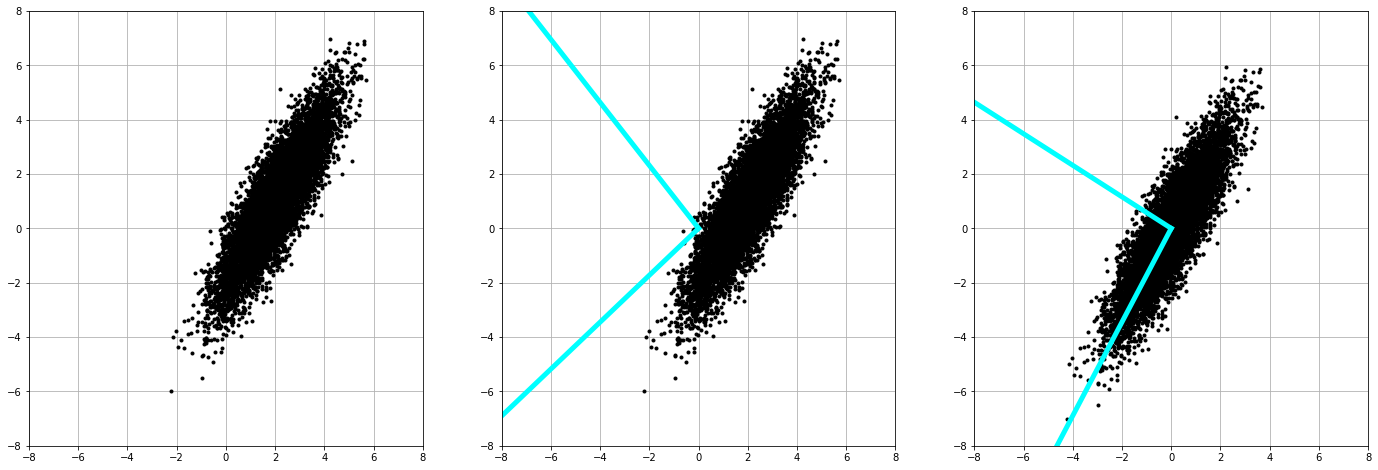

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [24, 8]

nPoints = 10000            # Create 10,000 points
xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes stretched by unit
theta = np.pi/3            # Rotate cloud by pi/3
R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))  #Data Matrix

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.plot(X[0,:],X[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-8,8))
plt.ylim((-8,8))

U, S, VT = np.linalg.svd(X,full_matrices=0)   #using SVD to find V of the above Data Matrix as the PCs     

ax2 = fig.add_subplot(132)
ax2.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-8,8))
plt.ylim((-8,8))

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([0, U[0,0]*S[0]]),
         np.array([0, U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)
ax2.plot(np.array([0, U[0,1]*S[1]]),
         np.array([0, U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)


Xavg = np.mean(X,axis=1)                  # Compute mean
B = (X - np.tile(Xavg,(nPoints,1)).T)       # Mean-subtracted data
U, S, VT = np.linalg.svd(B,full_matrices=0)   #using SVD to find V of the centered data Matrix as the PCs     


# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax3 = fig.add_subplot(133)
ax3.plot(B[0,:],B[1,:], '.', Color='k')   # Plot data to overlay PCA
ax3.grid()
plt.xlim((-8,8))
plt.ylim((-8,8))
ax3.plot(np.array([0, U[0,0]*S[0]]),
         np.array([0, U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)
ax3.plot(np.array([0, U[0,1]*S[1]]),
         np.array([0, U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)
